In [1]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

In [2]:
train_path='../data/train'
df_path='../data/train.csv'
trans = transforms.Compose(
    [
        transforms.Resize([224,224]), 
        transforms.ToTensor(),
        # transforms.Normalize((0.485,0.456,0.406), (0.229, 0.224, 0.225))
        ]
    )
lst = os.listdir(train_path)
lst[:3]

['n02795169', 'n02422699', 'n03498962']

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
device

device(type='mps')

In [4]:
df = pd.read_csv('../data/train.csv')
df.head()

,class_name,image_path,target
0,n01872401,n01872401/sketch_50.JPEG,59
1,n02417914,n02417914/sketch_11.JPEG,202
2,n02106166,n02106166/sketch_3.JPEG,138
3,n04235860,n04235860/sketch_2.JPEG,382
4,n02056570,n02056570/sketch_40.JPEG,80


In [5]:
# 이미지 있는 경로 싸그리 담아요 딕셔너리에 넣고 타겟으로 분류
img_path={i:[] for i in df['target'].unique()}
train_path='../data/train'                  # n~~~~~ 폴더 있는 경로 : train 폴더 찾아
for i in df['class_name'].unique():
    # print(df[df['class_name'] == i]['image_path'])  # 폴더별 이미지 다 뜯어와
    # print(df[df['class_name']==i])
    rows = df[df['class_name']==i]
    for image_path, target in zip(rows['image_path'], rows['target']):
        # img_path[row['target'].astype(int)].append(os.path.join(path, row['image_path']))
        # print(os.path.join(path,image_path), target)         ########## 여기서 파일을 불러와야지
        img_path[target].append(os.path.join(train_path,image_path))

In [6]:
# 경로 개수 확인~
num=0
for i in img_path.keys():
    num+=len(img_path[i])
print(num)

15021


In [7]:
# 경로에서 텐서 뽑자
tensors={i:[] for i in df['target'].unique()}
for i in img_path.keys():
    for path in img_path[i]:
        # 경로로 이미지 불러오기
        image = Image.open(path).convert('RGB')
        # image = trans(image).transpose(1,2).transpose(0,2).to(device=device)          # transforms에 normalize 켜면 그림 형체 알아보기 힘듦
        image = trans(image).transpose(1,2).transpose(0,2)                              # to(device) 할만한 자리
        # plt.imshow(image)
        tensors[i].append(image)

In [8]:
###################### pickle 만들면 8.5GB 나옴 : BAD
# import pickle
# import pickle
# tensors={i:[] for i in df['target'].unique()}
# if 'tensor.pkl' in os.listdir():
#     with open('tensors.pkl', 'rb') as f:
#         tensors = pickle.load(f)
# else:
#     # 경로에서 텐서 뽑자
#     for i in img_path.keys():
#         for path in img_path[i]:
#             # 경로로 이미지 불러오기
#             image = Image.open(path).convert('RGB')
#             image = trans(image).transpose(1,2).transpose(0,2).to(device=device)                 # transforms에 normalize 켜면 그림 형체 알아보기 힘듦
#             # plt.imshow(image)
#             tensors[i].append(image)

#     with open('tensors.pkl', 'wb') as f:
#         pickle.dump(tensors, f)

In [9]:
# 다 잘 들어왔니~
num=0
for i in tensors.keys():
    num+=len(tensors[i])
print(num)

15021


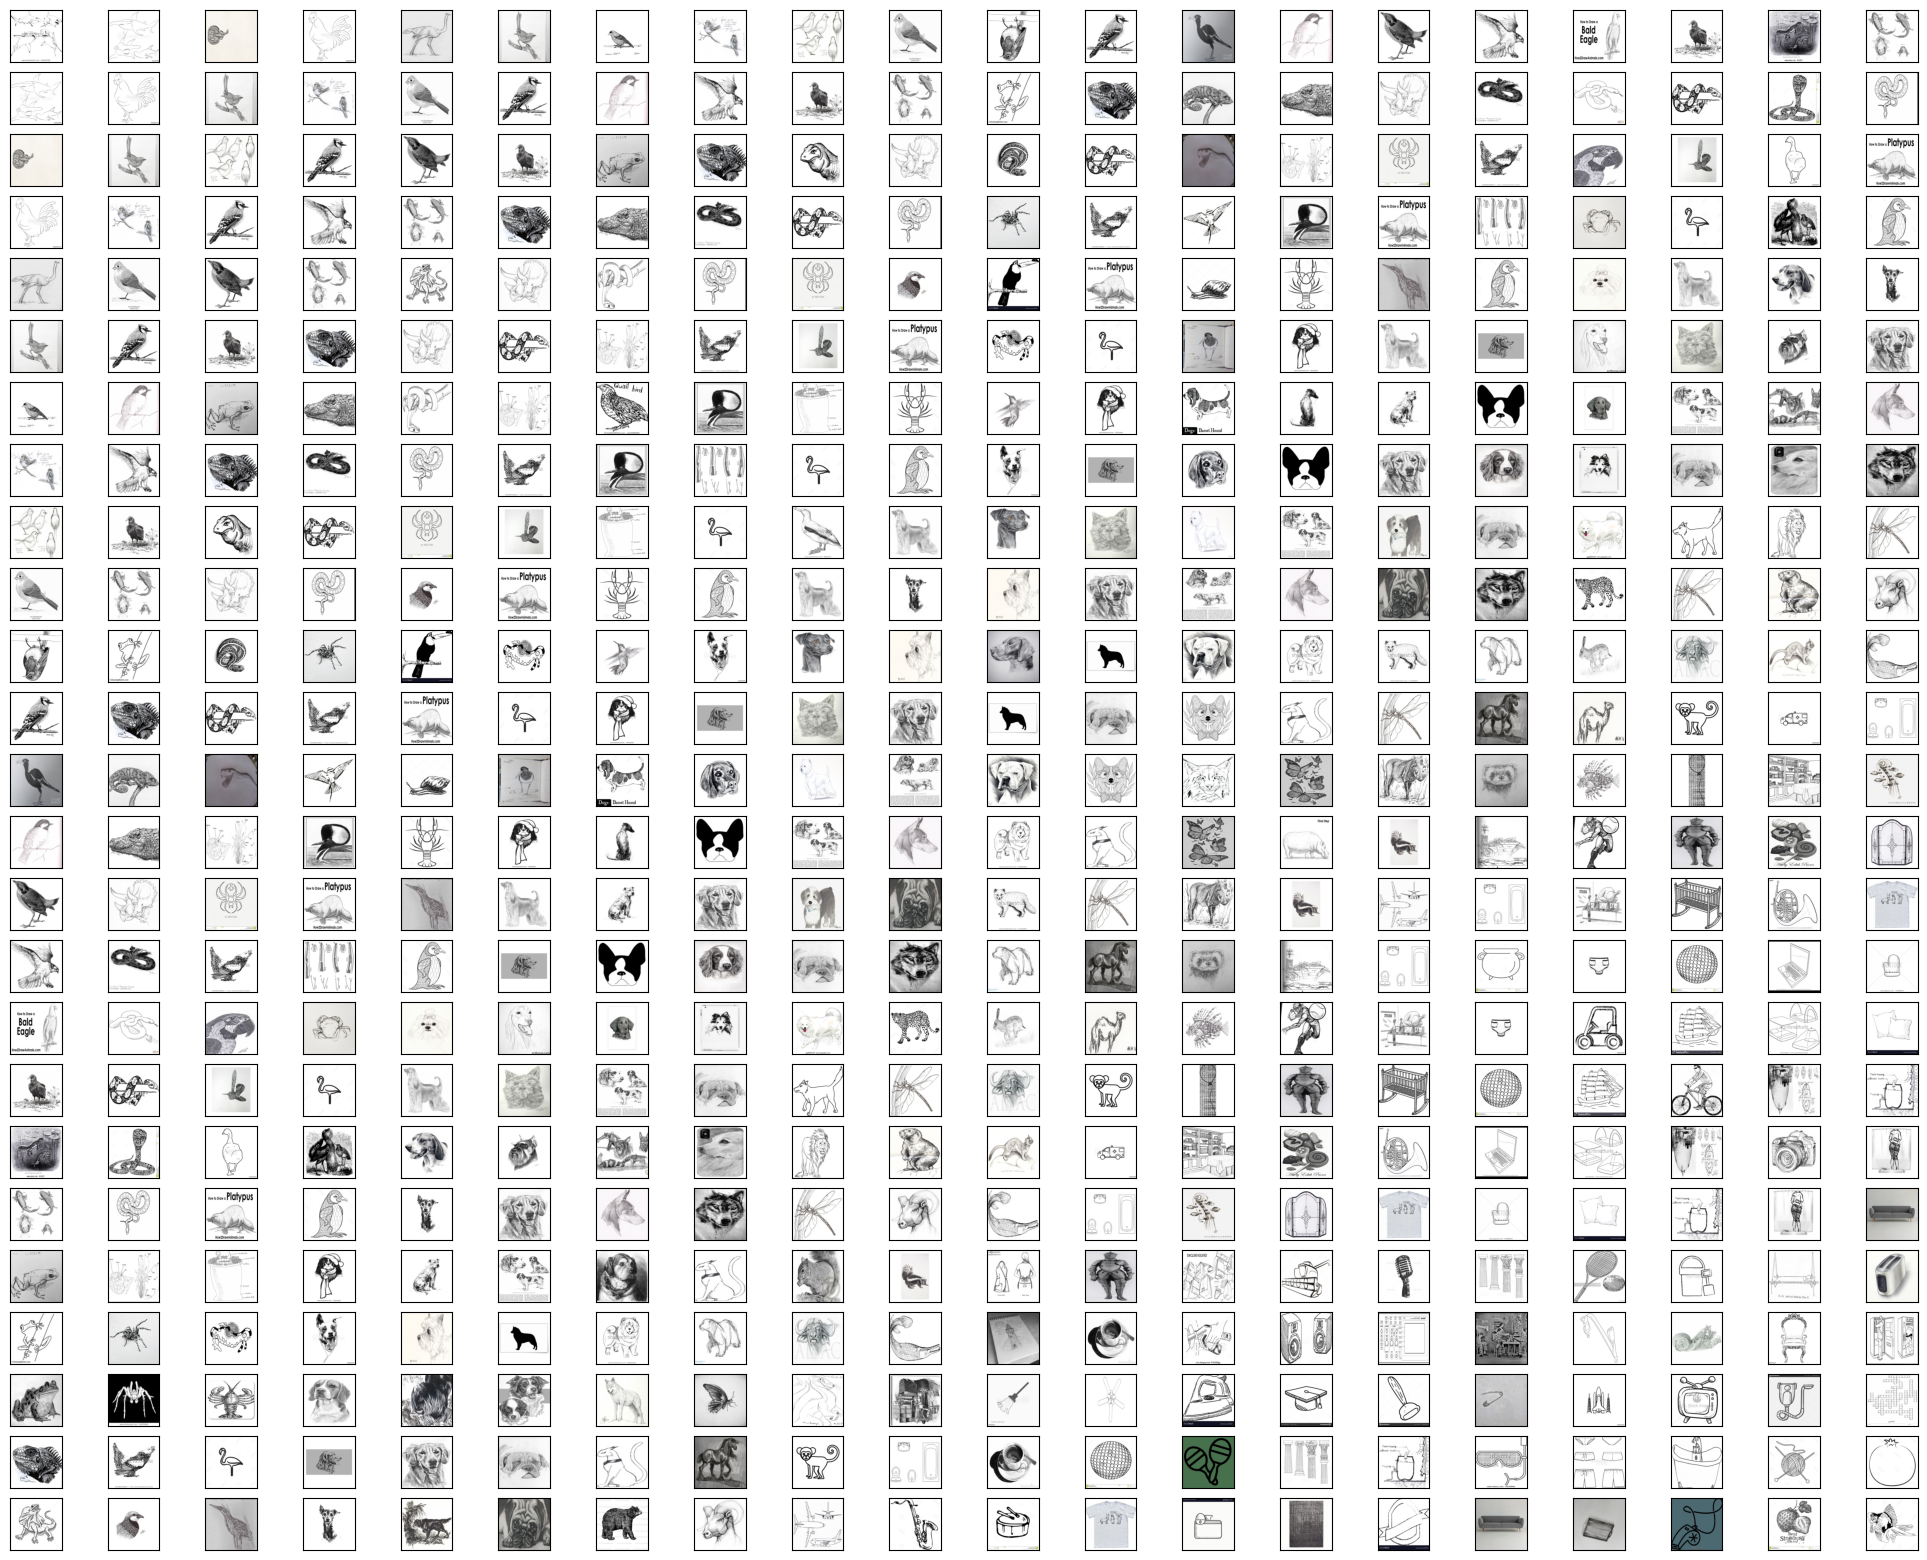

In [20]:
fig, axes = plt.subplots(25,20, figsize=[25,20])
for i in range(25):
    for j in range(20):
        if i==24 and j==19:
            axes[i][j].imshow(tensors[0][0])
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            break    
        axes[i][j].imshow(tensors[(i+1)*(j+1)][0])
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])